# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "../data/processed/data.csv"
df = pd.read_csv(path)

In [4]:
dfn = df.select_dtypes(exclude=['object'])
dfn

Hours_Studied  Attendance  bool_Extracurricular_Activities  Sleep_Hours  \
0                23          84                            False            7   
1                19          64                            False            8   
2                24          98                             True            7   
3                29          89                             True            8   
4                19          92                             True            6   
...             ...         ...                              ...          ...   
6373             25          69                            False            7   
6374             23          76                            False            8   
6375             20          90                             True            6   
6376             10          86                             True            6   
6377             15          67                             True            9   

      Previous_Scores  bool_Internet_Access  Tutoring_Sessions  \
0                  73                  True                  0   
1                  59                  True                  2   
2                  91                  True                  2   
3                  98                  True                  1   
4                  65                  True                  3   
...               ...                   ...                ...   
6373               76                  True                  1   
6374               81                  True                  3   
6375               65                  True                  3   
6376               91                  True                  2   
6377               94                  True                  0   

      School_Type_Private  School_Type_Public  Physical_Activity  \
0                   False                True                  3   
1                   False                True                  4   
2                   False                True                  4   
3                   False                True                  4   
4                   False                True                  4   
...                   ...                 ...                ...   
6373                False                True                  2   
6374                False                True                  2   
6375                False                True                  2   
6376                 True               False                  3   
6377                False                True                  4   

      numeric_Parental_Education_Level  numeric_Distance_from_Home  \
0                                    0                           0   
1                                    1                           1   
2                                    2                           0   
3                                    0                           1   
4                                    1                           0   
...                                ...                         ...   
6373                                 0                           0   
6374                                 0                           0   
6375                                 2                           0   
6376                                 0                           2   
6377                                 2                           0   

      Exam_Score  numeric_Parental_Involvement  numeric_Access_to_Resources  \
0             67                             0                            2   
1             61                             0                            1   
2             74                             1                            1   
3             71                             0                            1   
4             70                             1                            1   
...          ...                           ...                          ...   
6373          68             

In [21]:
from ydata_profiling import ProfileReport

In [22]:
dfn.loc[dfn['Exam_Score'] == 101, 'Exam_Score'] = 100

In [23]:
pr = ProfileReport(dfn, title="Pandas Profiling Report", explorative=True)

In [24]:
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 389.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
plt.style.use('rose-pine')

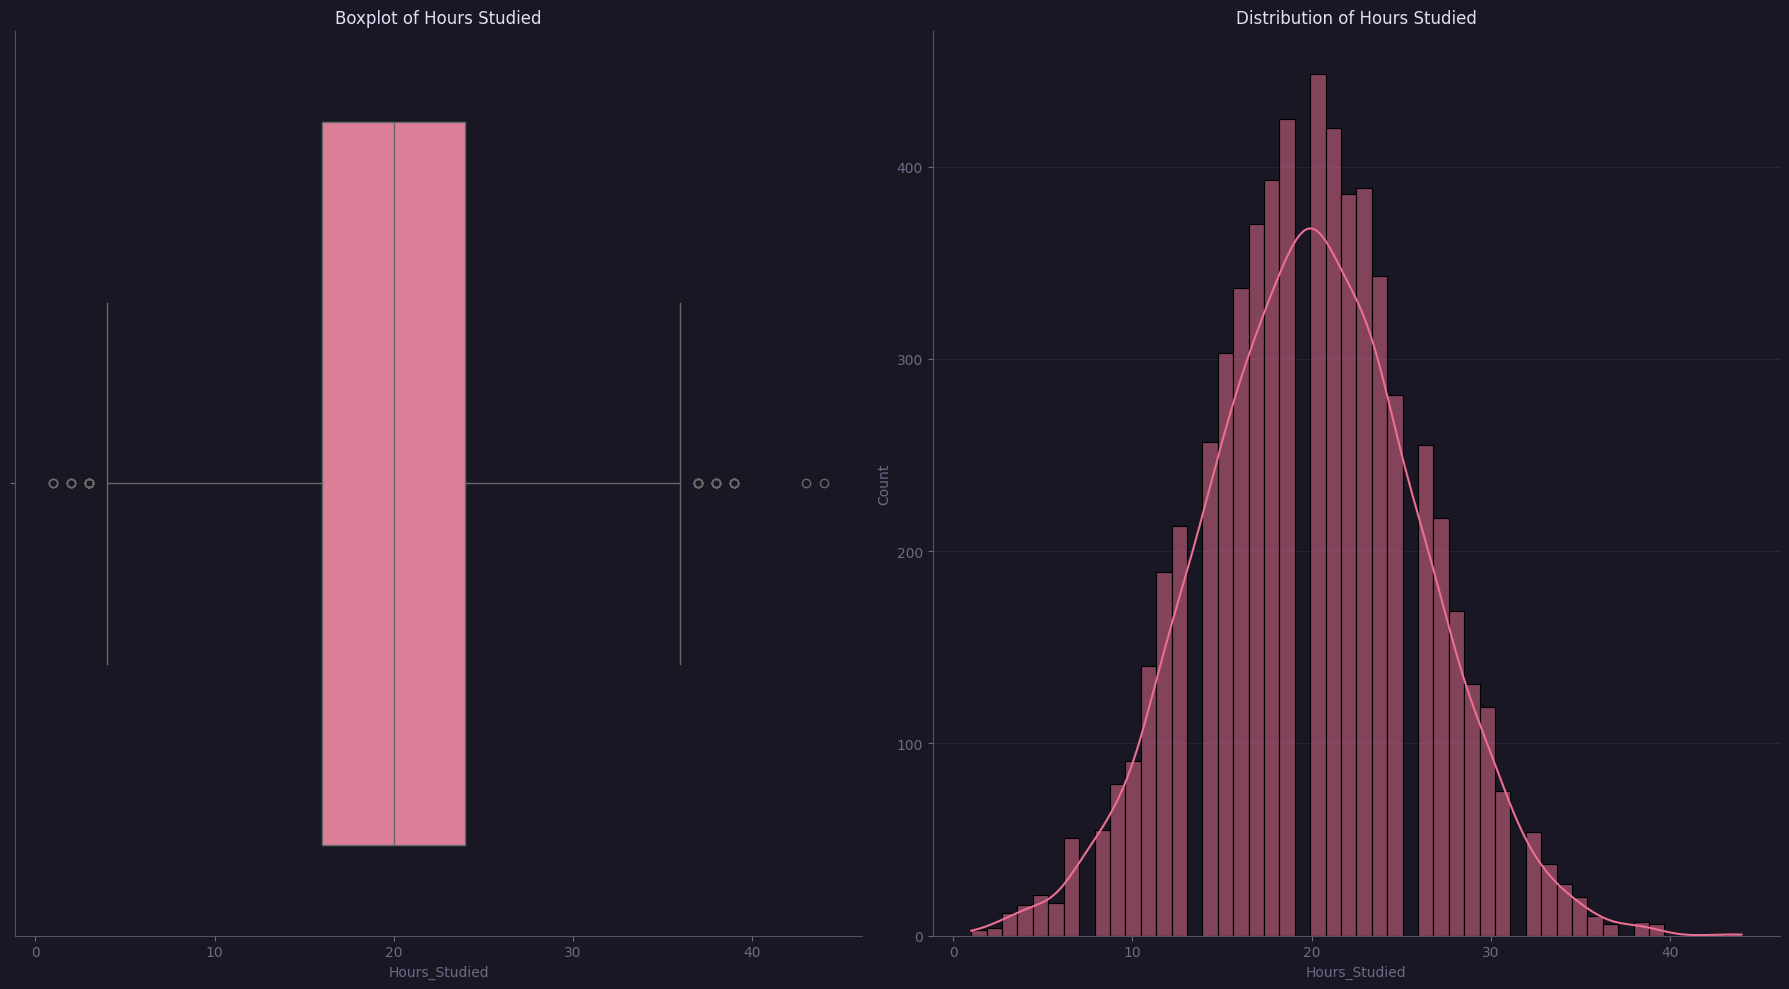

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Plot the boxplot in the first subplot
sns.boxplot(data=dfn, x='Hours_Studied', ax=axes[0])
axes[0].set_title('Boxplot of Hours Studied')

# Plot the distribution plot in the second subplot
sns.histplot(data=dfn, x='Hours_Studied', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Hours Studied')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = ['Hours_Studied',  'Attendance', 
                   'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 
                   'Physical_Activity']

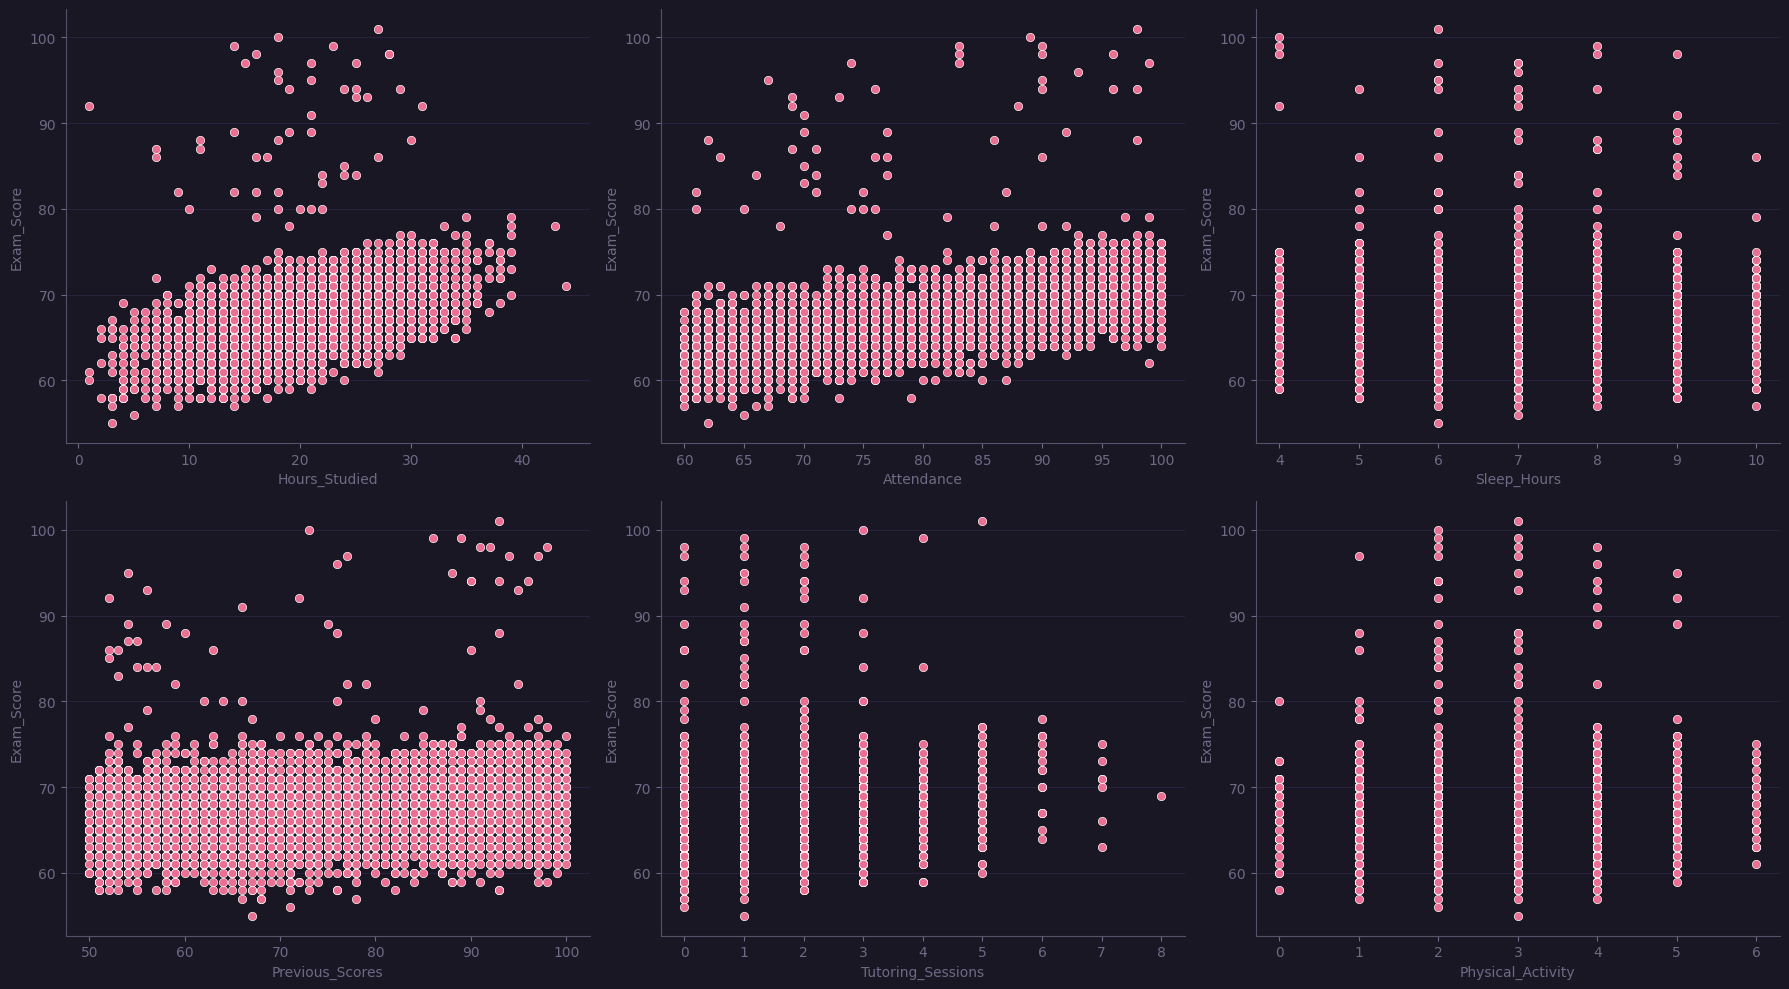

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i,j in enumerate(numeric_columns):
    sns.scatterplot(data=dfn, x=j, y='Exam_Score', ax=axes[i//3, i%3])

plt.tight_layout()
plt.show()

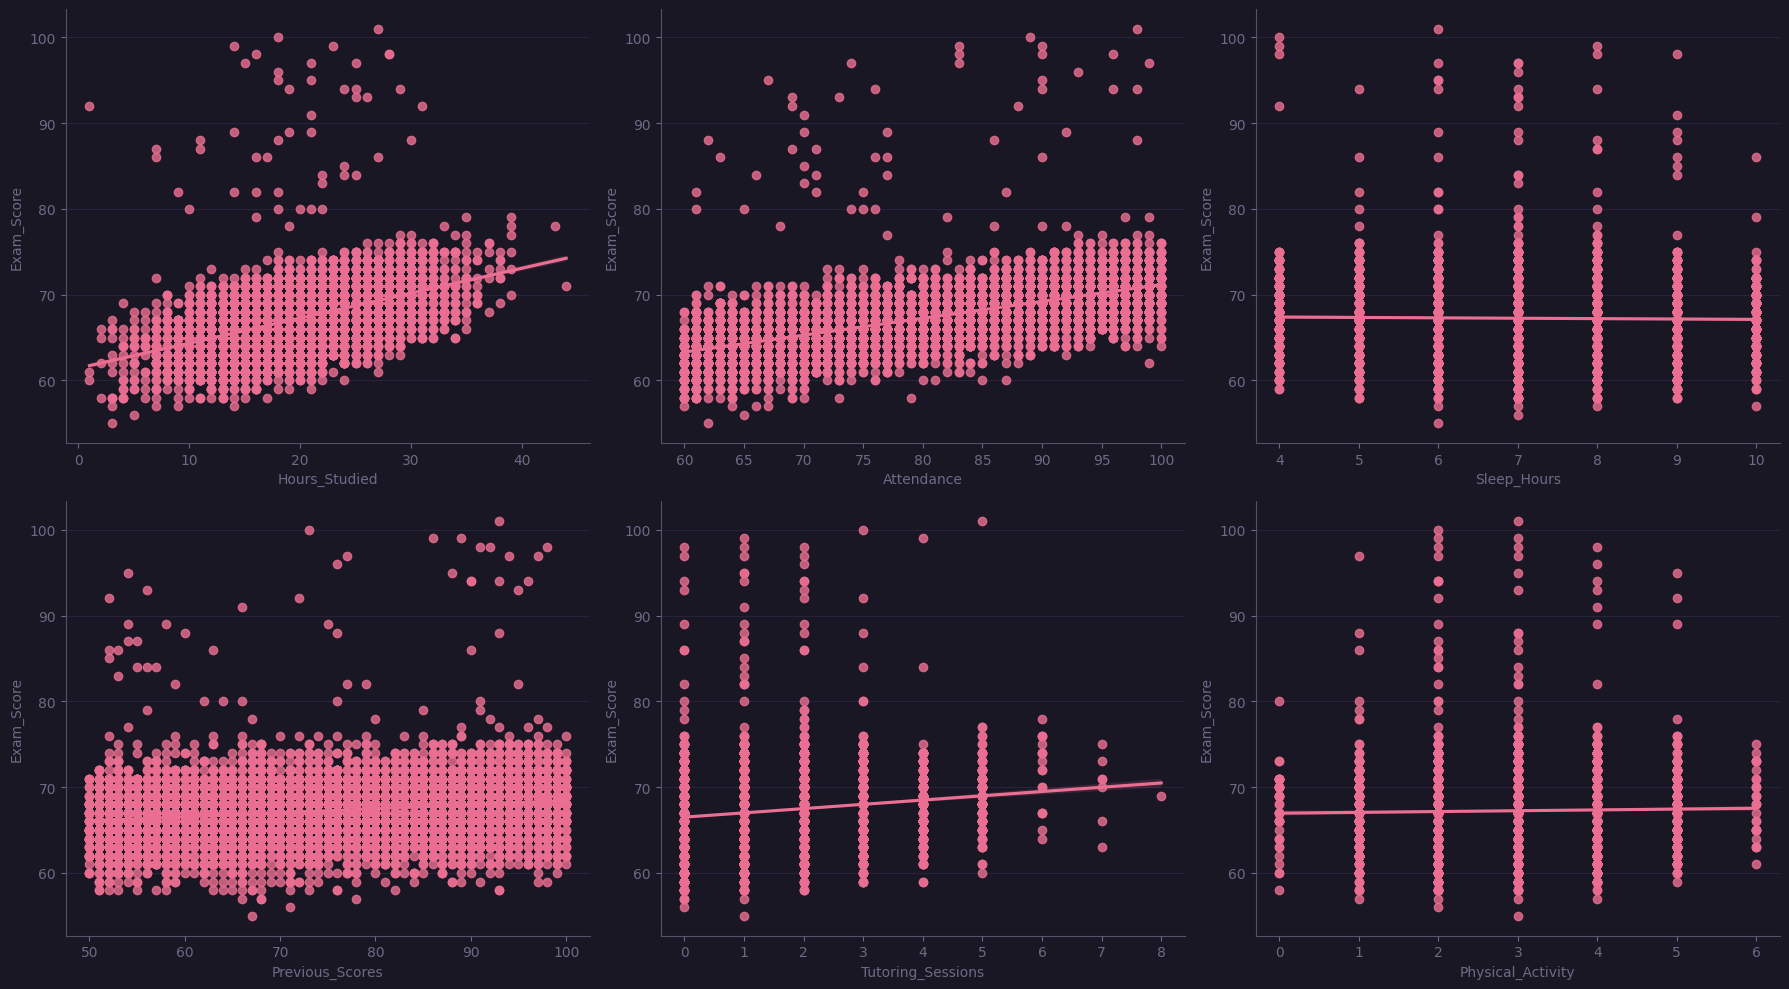

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i,j in enumerate(numeric_columns):
    sns.regplot(data=dfn, x=j, y='Exam_Score', ax=axes[i//3, i%3])

plt.tight_layout()
plt.show()

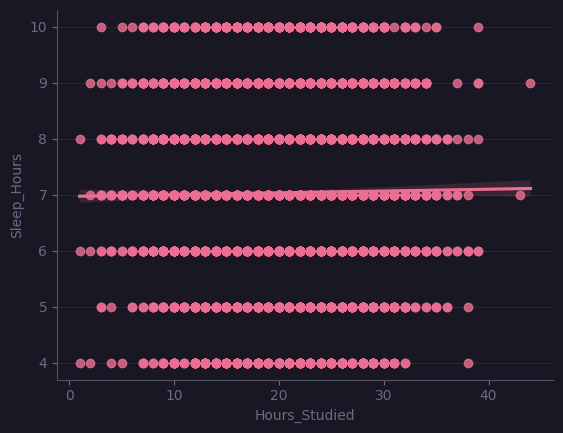

In [ ]:
sns.regplot(data=dfn, x='Hours_Studied', y='Sleep_Hours')
plt.show()

In [3]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities',
       'bool_Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores',
       'Motivation_Level', 'Internet_Access', 'bool_Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
       'School_Type_Private', 'School_Type_Public', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'numeric_Parental_Education_Level',
       'Distance_from_Home', 'numeric_Distance_from_Home', 'Gender',
       'Exam_Score', 'numeric_Parental_Involvement',
       'numeric_Access_to_Resources', 'numeric_Motivation_Level',
       'numeric_Family_Income', 'numeric_Teacher_Quality',
       'numeric_Peer_Influence', 'numeric_Learning_Disabilities'],
      dtype='object')

In [ ]:
df.to_csv("../data/processed/data.csv", index=False)

In [27]:
dfn.to_csv("../data/processed/numeric_data.csv", index=False)

In [28]:
pr.to_file("../reports/report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]